<img src = "images/banner.jpg" />

## AI FASHION DISCRIMINATOR

    AI Fashion Discriminator is a tool based on Convolutional Neural Networks that analyzes your ouftit be it as a picture you feed it manually or as a picture taken directly from your webcam.
    
    It helps you make better fashion decisions before going outside!

## **IMPORTS**

In [1]:

#!pip install imageio
#!pip install opencv-python
#!pip install matplotlib
#!pip install seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import seaborn as sns
import time
import scipy as sp
from rembg import remove
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras import optimizers

sns.set_theme()

2024-01-04 19:06:12.667690: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 19:06:13.741371: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Setting up path and categories 

In [3]:
import os
#Path for Windows usage
path = os.getcwd()+"/"
#path="/home/ch0ry/Documents/IA2/AI-Fashion-Discriminator/"

categories = ["Formal", "Preppy", "Sportswear", "Techwear", "Streetwear"]

## **Manipulating images**

In [6]:

def clean_background(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    hh, ww = thresh1.shape

    # make bottom 2 rows black where they are white the full width of the image
    thresh1[hh-3:hh, 0:ww] = 0

    # get bounds of white pixels
    white = np.where(thresh1==255)
    xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])

    # crop the image at the bounds adding back the two blackened rows at the bottom
    crop = img[ymin:ymax+3, xmin:xmax]

    crop = cv2.resize(crop, (175, 350))

    return crop

import glob




## GET RAW IMAGES

In [4]:

data = []

row = []

for cat in categories:
    
    row = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_RGB2BGR) for file in glob.glob(path + 'Dataset/'+ cat +'/*.jpg')]
    
    data.append(row)

## GET CLEAN IMAGES

In [14]:
data = []

row = []

for cat in categories:
    
    row = [clean_background(cv2.cvtColor(cv2.imread(file), cv2.COLOR_RGB2BGR)) for file in glob.glob(path + 'Dataset/'+ cat +'/NoBg/*.png')]
    
    data.append(row)

## **THIS BLOCK IS USED TO REMOVE BACKGROUND FROM IMAGES, ONLY USE WHEN NEW IMAGES ARE ADDED**

In [13]:

#!pip install --ignore-installed --pre onnxruntime-gpu --user
#!pip install rembg
#from rembg import remove


idx = 0
for cat in data:
    label = categories[idx]
    idx +=1
    seq = 0
    for input in cat:
        output_path = path+ "Dataset/" + label + "/NoBg/"+label+"Clean{}.png".format(seq)
        print(output_path)
        output = remove(input)
        cv2.imwrite(output_path, output)
        seq += 1


C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean0.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean1.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean2.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean3.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean4.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean5.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean6.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean7.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean8.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean9.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean10.png
C:\Users\Juan P\Documents\AI-Fa

C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean93.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean94.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean95.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean96.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean97.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean98.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean99.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean100.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Formal/NoBg/FormalClean101.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean0.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean1.png
C:\Users\Juan P\Docum

C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean84.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean85.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean86.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean87.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean88.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean89.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean90.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean91.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean92.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean93.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Preppy/NoBg/PreppyClean94.png
C:\Users\Juan P\Docum

C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean70.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean71.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean72.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean73.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean74.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean75.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean76.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean77.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean78.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Sportswear/NoBg/SportswearClean79.png
C:\Users\Juan P\Documents\AI-F

C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean57.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean58.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean59.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean60.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean61.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean62.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean63.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean64.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean65.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/NoBg/TechwearClean66.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Techwear/No

C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean43.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean44.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean45.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean46.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean47.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean48.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean49.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean50.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean51.png
C:\Users\Juan P\Documents\AI-Fashion-Discriminator/Dataset/Streetwear/NoBg/StreetwearClean52.png
C:\Users\Juan P\Documents\AI-F

## **Dataset showcase**

### Clean Images

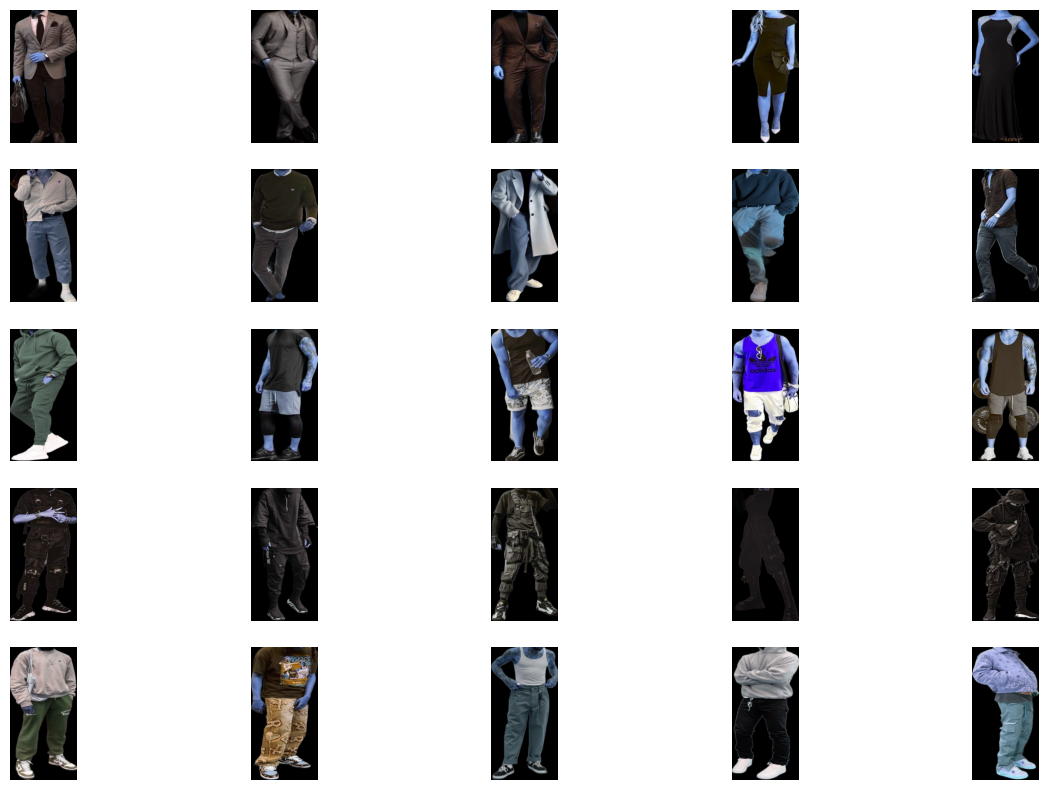

In [5]:
import math
fig = plt.figure(figsize = (15, 10))

rows = len(categories)
columns = 5

for i in range(rows*columns):
  
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(data[math.floor(i/columns)][i - math.floor(i/columns)*columns])
  plt.axis('off')
  #plt.title(i+1)


plt.show()

### Raw Images

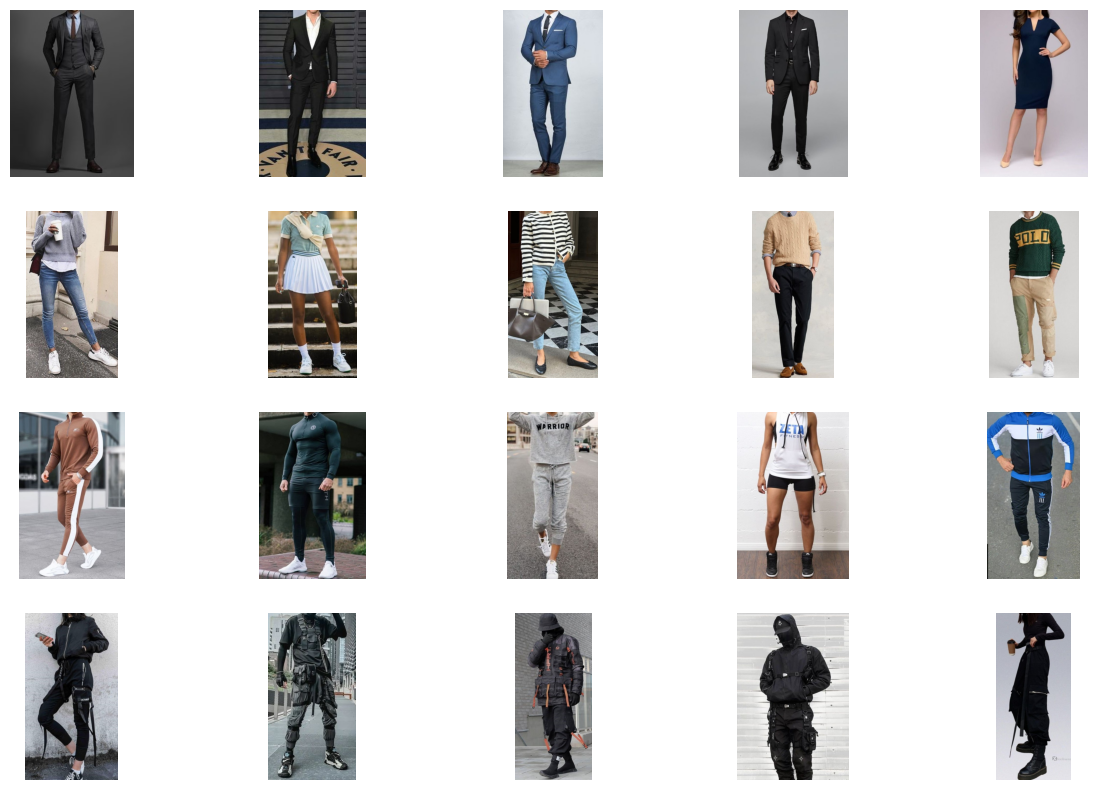

In [8]:
import math
fig = plt.figure(figsize = (15, 10))

rows = len(categories)
columns = 5

for i in range(rows*columns):
  
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(data[math.floor(i/columns)][i - math.floor(i/columns)*columns])
  plt.axis('off')
  #plt.title(i+1)


plt.show()

## **Model implementation**

## Preparing data, designing and training the CNN

In [16]:
models[0].summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 349, 174, 32)      416       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 175, 87, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 174, 86, 32)       4128      
                                                                 
 dropout_7 (Dropout)         (None, 174, 86, 32)       0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 87, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 84, 40, 16)      

In [12]:
#@title **Preparing data**
#!pip install scikit-learn
#!pip install tensorflow
#!pip install keras
#!pip install protobuf==3.19.4 --user



models = []
histories = []

#Creating staggered datasets for tree structure training

for i in range(len(categories)-1):

    X = list()
    y = list()
    
    #Base model of all of the nodes within the tree
    
    base_model = tf.keras.models.Sequential()
    base_model.add(layers.Conv2D(32, (2, 2), activation='relu' ,input_shape=(350, 175, 3)))
    base_model.add(layers.MaxPooling2D((2, 2), padding='same'))
    base_model.add(layers.Conv2D(32, (2, 2), activation='relu'))
    base_model.add(layers.Dropout(0.2))
    base_model.add(layers.MaxPooling2D((2, 2), padding='same'))
    base_model.add(layers.Conv2D(16, (4, 4), activation='relu'))
    base_model.add(layers.Flatten())
    base_model.add(layers.Dense(128, activation='relu'))
    base_model.add(layers.Dense(1, activation='sigmoid'))
    
    
    #Setting up labels and images according to staggered structure
    
    for img in data[i]:
        X.append(np.asarray(img))
        y.append(1)
    
    for j in range(i+1, len(categories)):
        
        for img in data[j]:
            X.append(np.asarray(img))
            y.append(0) 
        
        
    #Data handling

    X = np.asarray(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    
    y_test = np.asarray(y_test)

    y_train = np.asarray(y_train)
    
    #Compilation and training of the current model
    
    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    
    base_model.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
   
    
    history = base_model.fit(X_train, y_train, epochs=5,
                        validation_data=(X_test, y_test), verbose=True)
    
    histories.append(history)
    models.append(base_model)
    
    


Epoch 1/5



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



10/10 [==============================] - 5s 392ms/step - loss: 29.8921 - accuracy: 0.7508 - val_loss: 3.1763 - val_accuracy: 0.3663
Epoch 2/5
10/10 [==============================] - 4s 373ms/step - loss: 3.7616 - accuracy: 0.4551 - val_loss: 1.8612 - val_accuracy: 0.8119
Epoch 3/5
10/10 [==============================] - 4s 379ms/step - loss: 1.8609 - accuracy: 0.7940 - val_loss: 0.6229 - val_accuracy: 0.7921
Epoch 4/5
10/10 [==============================] - 4s 390ms/step - loss: 0.4719 - accuracy: 0.7342 - val_loss: 0.4729 - val_accuracy: 0.8218
Epoch 5/5
10/10 [==============================] - 4s 375ms/step - loss: 0.3653 - accuracy: 0.8405 - val_loss: 0.4383 - val_accuracy: 0.8267
Epoch 1/5
8/8 [==============================] - 4s 417ms/step - loss: 33.9620 - accuracy: 0.6458 - val_loss: 1.9896 - val_accuracy: 0.4534
Epoch 2/5
8/8 [==============================] - 3s 401ms/step - loss: 1.5406 - accuracy: 0.5792 - val_loss: 1.2230 - val_accuracy: 0.7702
Epoch 3/5
8/8 [=========

## Saving the models

In [45]:
for i in range(len(models)):
    models[i].save(path+"/models/model{}.h5".format(i))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Feed forward function to implement the decision tree structure

In [3]:
#!pip install graphviz
def feedForward(img):
    #print(img.shape)
    
    fig = plt.figure(figsize = (15, 10))
    
    plt.imshow(img)
    
    plt.axis('off')
    
    img = np.expand_dims(img, axis=0)
    
    result = []
    
    for i in range(len(models)):
        pred = models[i].predict(img, verbose='false')[0][0]
        print(pred)
        result.append(pred)
        #if pred >= 0.5:
        #    res = categories[i]
        #    print(res)
        #    return res
    #res = categories[-1]
    #print(res)
    return result

        

## Plot decision tree graph

In [4]:
#!pip install graphviz
from graphviz import Digraph

def plotTree(labels, result):
    dot = Digraph()
    for i in range(len(labels)-1):
        
        dot.attr('node', color='black')
        dot.node(str(i))
        #dot.attr('node', color='red')
        #if result[i] >= 0.5:
            #dot.attr('node', color='green')
        dot.attr('node', colorscheme='piyg10', color=str(math.ceil(result[i]/(1/10))) )    
            
        
        dot.node(labels[i])
        dot.edge(str(i), labels[i])
        
    for j in range(len(labels)-2):
        dot.edge(str(j), str(j+1))
        
    dot.attr('node', colorscheme='piyg10', color=str(math.ceil((1-result[i])/(1/10))) )   
        
    dot.node(labels[-1])
    
    
    dot.edge(str(len(labels)-2), labels[len(labels)-1])
    return dot
    
    

## Testing with random data from dataset

0.03232823
0.21071216
0.023749663
2.4837671e-08


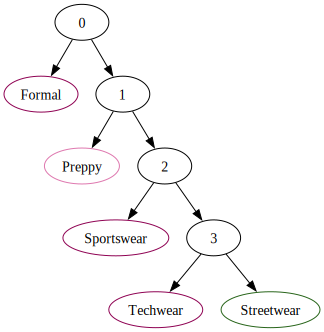

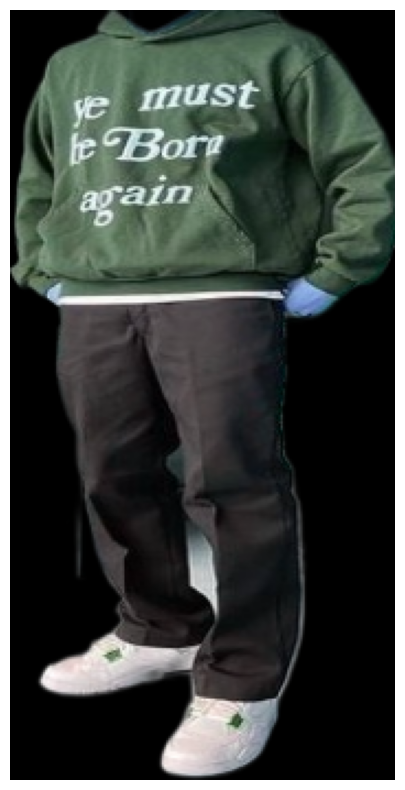

In [37]:
plotTree(categories, feedForward(data[4][10]))

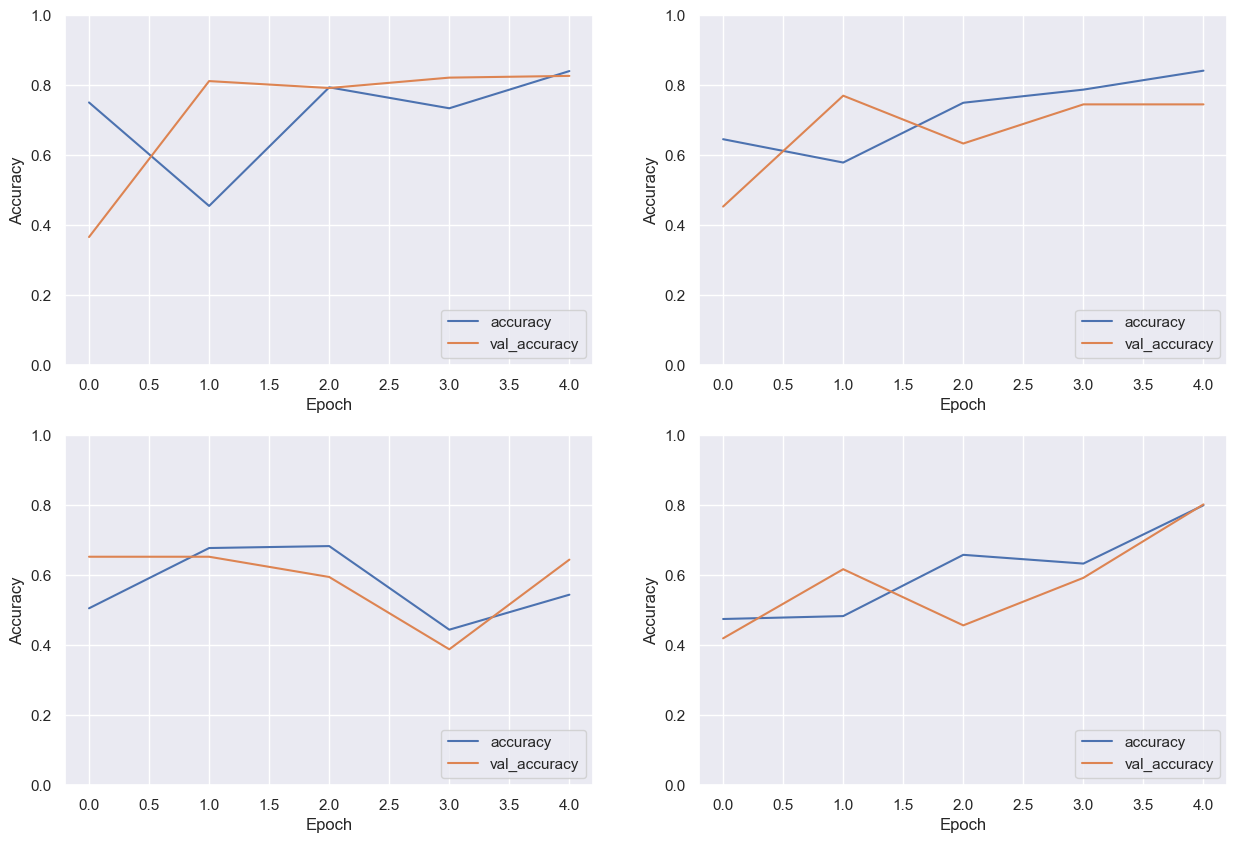

In [38]:
fig = plt.figure(figsize = (15, 10))

for history in histories:
    fig.add_subplot(2,2, histories.index(history)+1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1])
    plt.legend(loc='lower right')

<img src = "accuracy_graph.png" />

In [43]:
def showActivations(layerId, mod):
    
    layer_outputs = [layer.output for layer in mod.layers ]
    activation_model = tf.keras.models.Model(inputs=mod.input, outputs=layer_outputs)
    array = np.expand_dims(data[3][4], axis=0)
    activations = activation_model.predict(array)
    plt.figure(figsize=(40,50), dpi=100)
    
    layer = layer_outputs[layerId]
    
    activNum = layer.shape[3]
    
    base = 2
    
    if activNum > 20:
        print(math.ceil(activNum/10))
        
        base = math.ceil(activNum/10)

    for i in range(activNum):
        plt.subplot(base,math.ceil(activNum/base),i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(activations[layerId][0,:, :, i], cmap='jet')

1/1 [==============================] - 0s 63ms/step
4


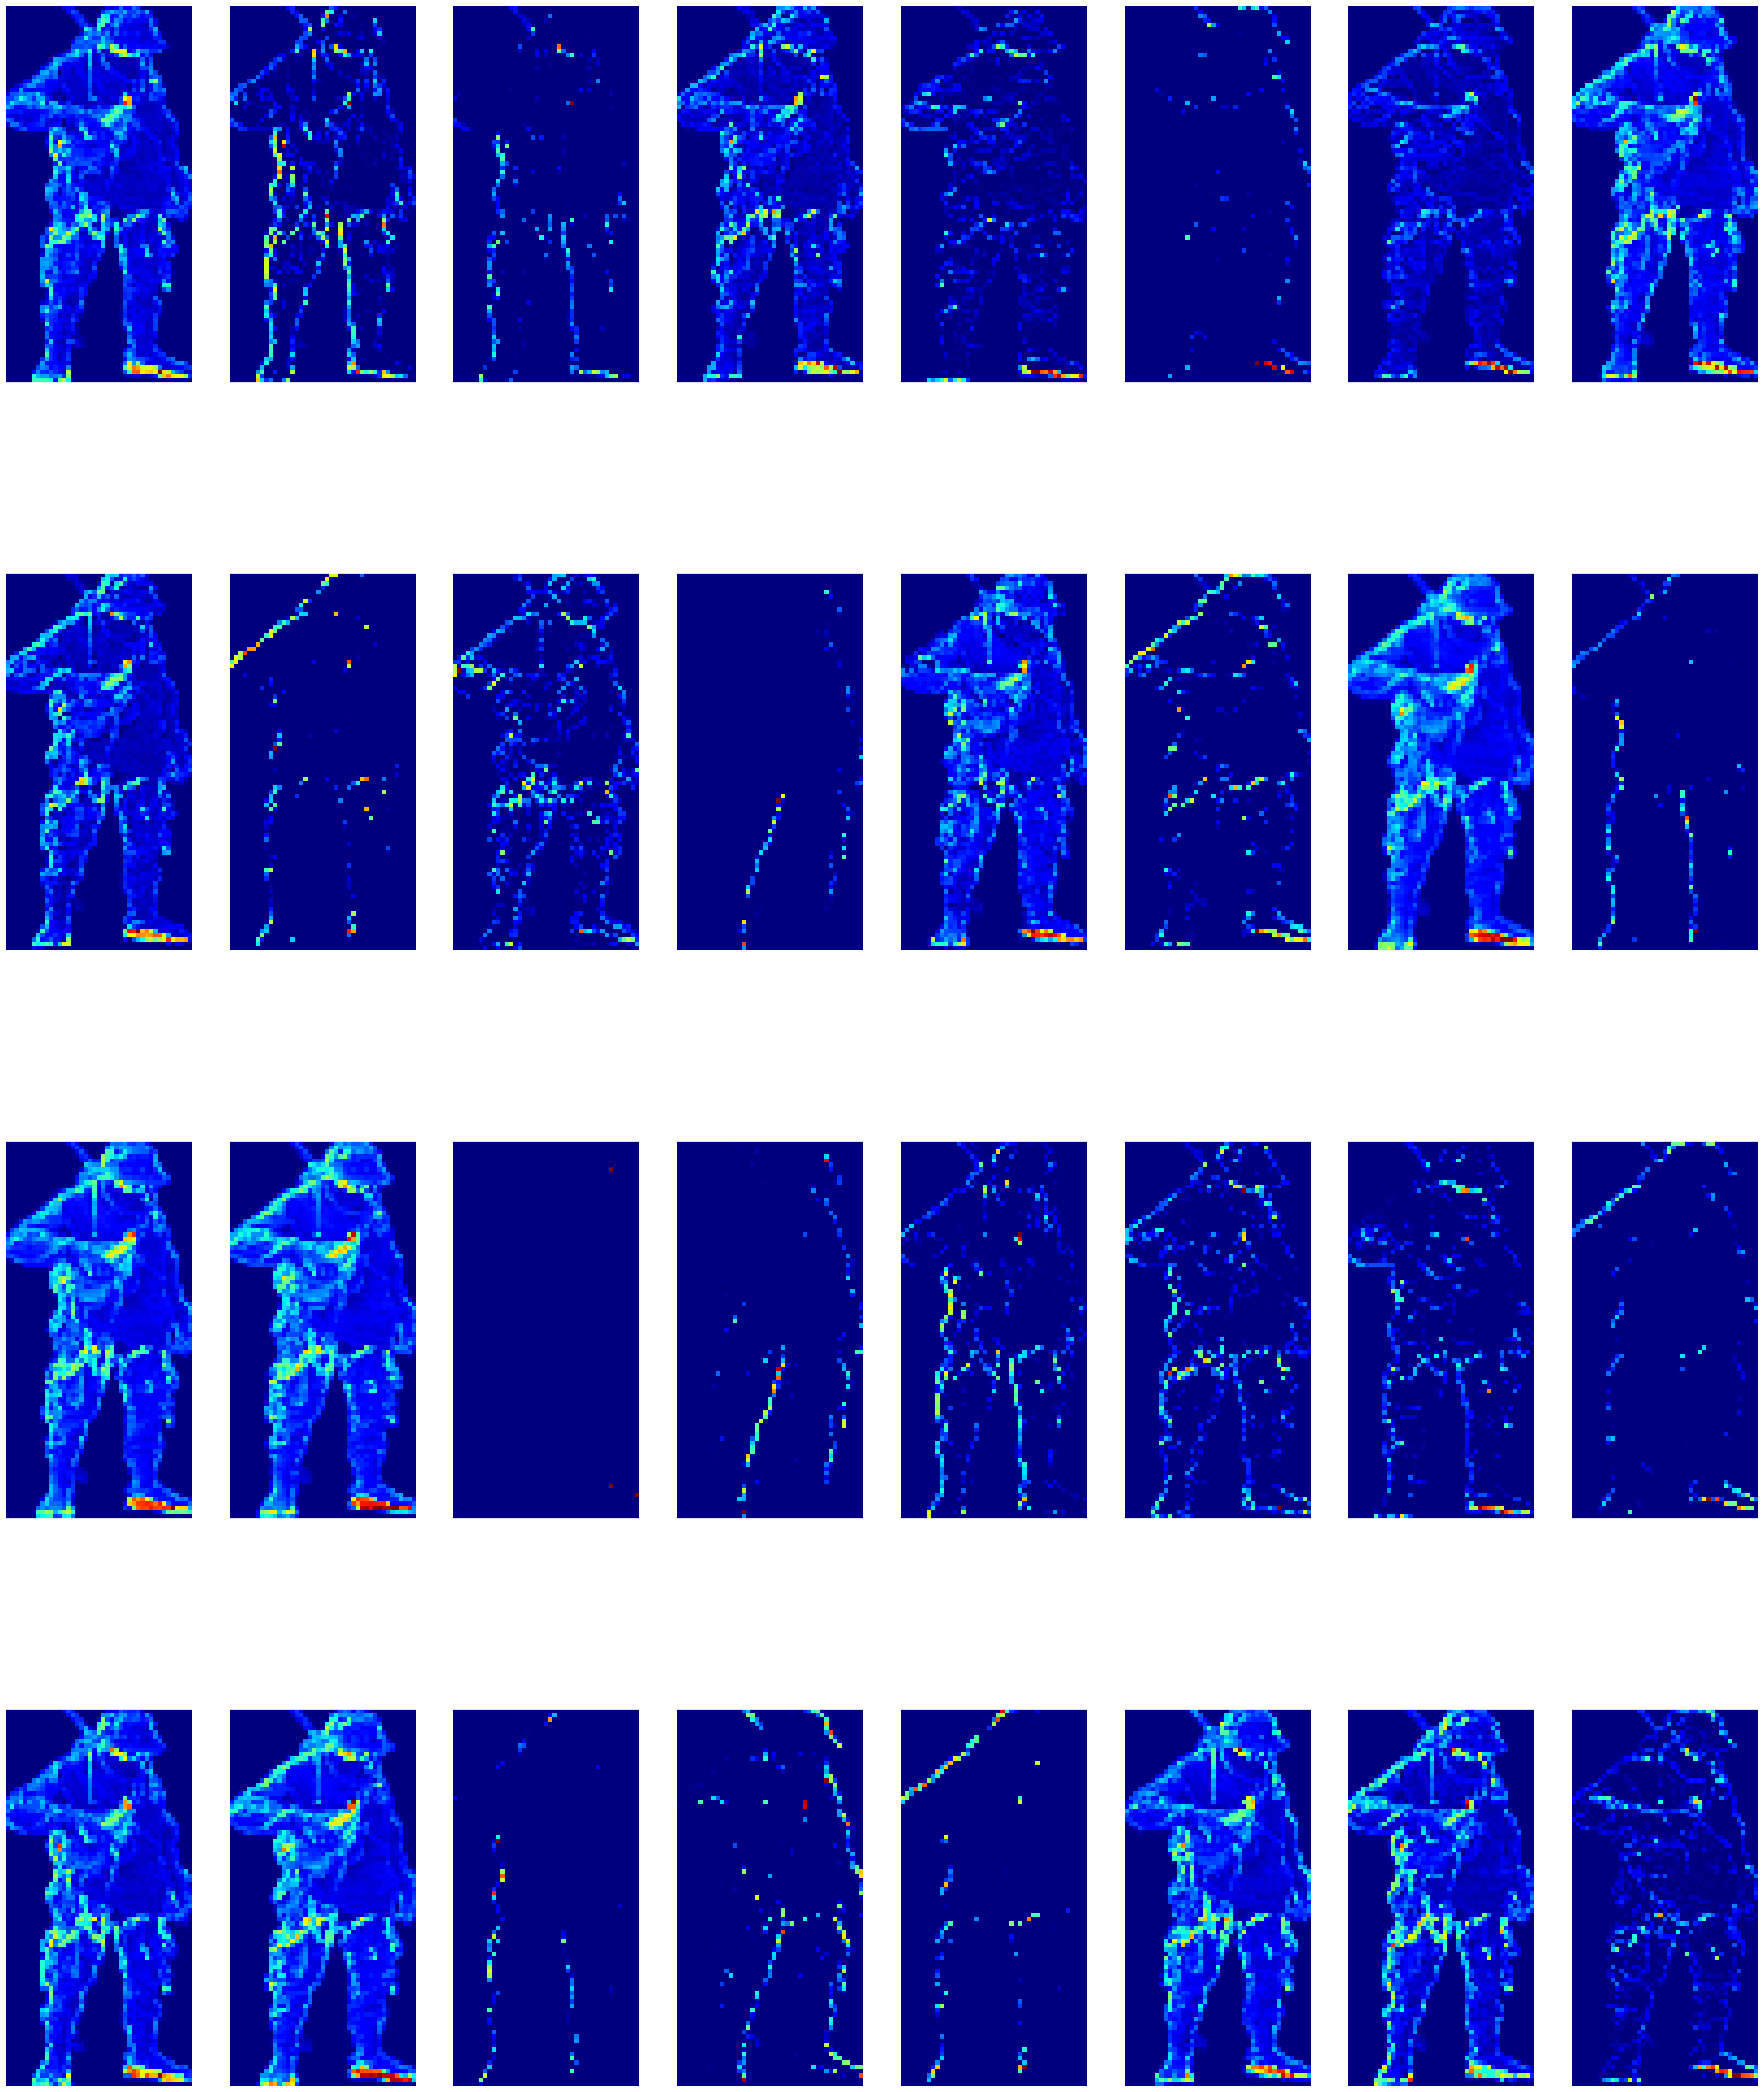

In [44]:
showActivations(4, models[0])

## Loading the trained model for usage

In [9]:
import tensorflow as tf
import tensorflow.keras as keras

models = []

for i in range(len(categories) - 1):
    models.append(keras.models.load_model(path + 'Models/model{}.h5'.format(i)))



# Training a multi-class model

In [8]:
data = []

row = []

for cat in categories:
    
    row = [clean_background(cv2.cvtColor(cv2.imread(file), cv2.COLOR_RGB2BGR)) for file in glob.glob(path + 'Dataset/'+ cat +'/NoBg/*.png')]
    
    data.append(row)

processed_model = tf.keras.models.Sequential()
processed_model.add(layers.Conv2D(32, (2, 2), activation='relu' ,input_shape=(350, 175, 3)))
processed_model.add(layers.MaxPooling2D((2, 2), padding='same'))
processed_model.add(layers.Conv2D(64, (4, 4), activation='relu'))
processed_model.add(layers.MaxPooling2D((2, 2), padding='same'))
processed_model.add(layers.Dropout(0.3))
processed_model.add(layers.Conv2D(64, (2, 2), activation='relu'))
processed_model.add(layers.MaxPooling2D((2, 2), padding='same'))
processed_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
processed_model.add(layers.Dropout(0.3))
processed_model.add(layers.MaxPooling2D((2, 2), padding='same'))
processed_model.add(layers.Conv2D(16, (4, 4), activation='relu'))
processed_model.add(layers.Flatten())
processed_model.add(layers.Dense(128, activation='sigmoid'))
processed_model.add(layers.Dense(64, activation='sigmoid'))
processed_model.add(layers.Dense(len(categories), activation='softmax'))

X = np.ndarray(shape=(len(categories)*100, 350, 175, 3), dtype=int)

y = np.ndarray(shape=(len(categories)*100, len(categories)), dtype=int)


for i in range(len(categories)):
    for j in range(100):    
        X[j+(100*i)] = data[i][j]
        row = np.zeros(shape=(len(categories)))
        row[i] = 1
        y[j+(100*i)] = row
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Compilation and training of the current model
    
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    
processed_model.compile(optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'])
   
    
processed_history = processed_model.fit(X_train, y_train, epochs=100,
            validation_data=(X_test, y_test), verbose=True)
        
processed_model.save(path+"/models/processed_model")

Epoch 1/100


11/11 [==============================] - 8s 619ms/step - loss: 1.6323 - accuracy: 0.1800 - val_loss: 1.6089 - val_accuracy: 0.2400
Epoch 2/100
11/11 [==============================] - 6s 578ms/step - loss: 1.6045 - accuracy: 0.2200 - val_loss: 1.6036 - val_accuracy: 0.2400
Epoch 3/100
11/11 [==============================] - 6s 573ms/step - loss: 1.5808 - accuracy: 0.2914 - val_loss: 1.5896 - val_accuracy: 0.2533
Epoch 4/100
11/11 [==============================] - 7s 650ms/step - loss: 1.5701 - accuracy: 0.3200 - val_loss: 1.5877 - val_accuracy: 0.2600
Epoch 5/100
11/11 [==============================] - 7s 621ms/step - loss: 1.5679 - accuracy: 0.3657 - val_loss: 1.5884 - val_accuracy: 0.2600
Epoch 6/100
11/11 [==============================] - 6s 584ms/step - loss: 1.5608 - accuracy: 0.3600 - val_loss: 1.5854 - val_accuracy: 0.2600
Epoch 7/100
11/11 [==============================] - 7s 602ms/step - loss: 1.5572 - accuracy: 0.3800 - val_loss: 1.5866 - val_accuracy: 0.25

Epoch 55/100
11/11 [==============================] - 7s 634ms/step - loss: 0.9780 - accuracy: 0.7314 - val_loss: 1.1921 - val_accuracy: 0.5667
Epoch 56/100
11/11 [==============================] - 7s 627ms/step - loss: 0.9623 - accuracy: 0.7514 - val_loss: 1.1734 - val_accuracy: 0.6000
Epoch 57/100
11/11 [==============================] - 7s 631ms/step - loss: 0.9374 - accuracy: 0.7714 - val_loss: 1.1627 - val_accuracy: 0.5733
Epoch 58/100
11/11 [==============================] - 7s 642ms/step - loss: 0.9293 - accuracy: 0.7629 - val_loss: 1.1604 - val_accuracy: 0.5933
Epoch 59/100
11/11 [==============================] - 7s 636ms/step - loss: 0.9040 - accuracy: 0.7800 - val_loss: 1.1528 - val_accuracy: 0.5933
Epoch 60/100
11/11 [==============================] - 7s 637ms/step - loss: 0.8771 - accuracy: 0.7857 - val_loss: 1.1303 - val_accuracy: 0.5933
Epoch 61/100
11/11 [==============================] - 7s 645ms/step - loss: 0.8716 - accuracy: 0.7914 - val_loss: 1.1204 - val_accuracy:

INFO:tensorflow:Assets written to: C:\Users\Juan P\Documents\AI-Fashion-Discriminator//models/processed_model\assets


In [29]:
processed_model.save(path+"/models/multiclassModel66")


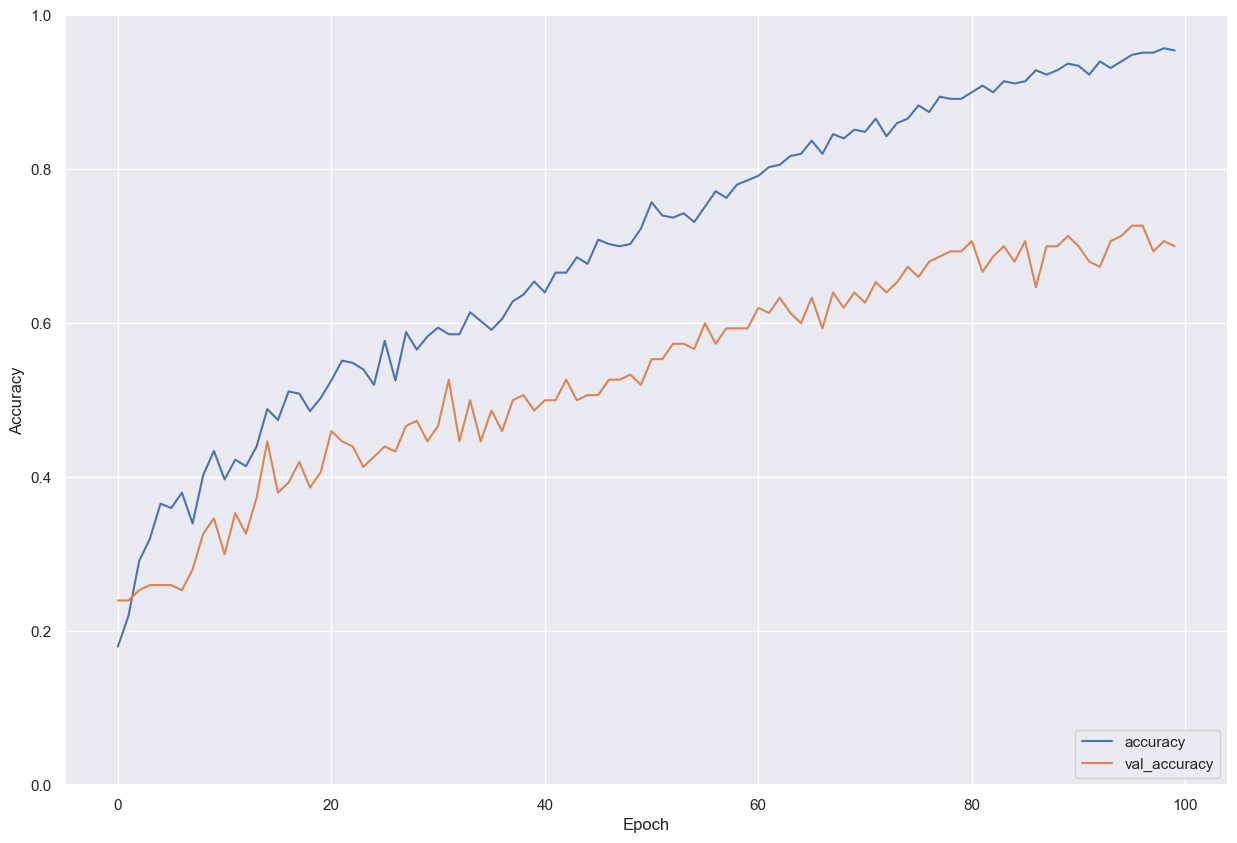

In [9]:
fig = plt.figure(figsize = (15, 10))


#fig.add_subplot(2,2, histories.index(history)+1)
plt.plot(processed_history.history['accuracy'], label='accuracy')
plt.plot(processed_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

# What if we trained the model without removing the background?

In [10]:
data = []

row = []

for cat in categories:
    
    row = [cv2.cvtColor(clean_background(cv2.imread(file)), cv2.COLOR_RGB2BGR) for file in glob.glob(path + 'Dataset/'+ cat +'/*.jpg')]
    
    data.append(row)
    
raw_model = tf.keras.models.Sequential()
raw_model.add(layers.Conv2D(32, (2, 2), activation='relu' ,input_shape=(350, 175, 3)))
raw_model.add(layers.MaxPooling2D((2, 2), padding='same'))
raw_model.add(layers.Conv2D(64, (4, 4), activation='relu'))
raw_model.add(layers.MaxPooling2D((2, 2), padding='same'))
raw_model.add(layers.Dropout(0.3))
raw_model.add(layers.Conv2D(64, (2, 2), activation='relu'))
raw_model.add(layers.MaxPooling2D((2, 2), padding='same'))
raw_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
raw_model.add(layers.Dropout(0.3))
raw_model.add(layers.MaxPooling2D((2, 2), padding='same'))
raw_model.add(layers.Conv2D(16, (4, 4), activation='relu'))
raw_model.add(layers.Flatten())
raw_model.add(layers.Dense(128, activation='sigmoid'))
raw_model.add(layers.Dense(64, activation='sigmoid'))
raw_model.add(layers.Dense(len(categories), activation='softmax'))

X = np.ndarray(shape=(len(categories)*100, 350, 175, 3), dtype=int)

y = np.ndarray(shape=(len(categories)*100, len(categories)), dtype=int)


for i in range(len(categories)):
    for j in range(100):    
        X[j+(100*i)] = data[i][j]
        row = np.zeros(shape=(len(categories)))
        row[i] = 1
        y[j+(100*i)] = row
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Compilation and training of the current model
    
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    
raw_model.compile(optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'])
   
    
raw_history = raw_model.fit(X_train, y_train, epochs=100,
            validation_data=(X_test, y_test), verbose=True)

raw_model.save(path+"/models/raw_model")
        
    

Epoch 1/100
11/11 [==============================] - 7s 561ms/step - loss: 1.7762 - accuracy: 0.2000 - val_loss: 1.6636 - val_accuracy: 0.2000
Epoch 2/100
11/11 [==============================] - 6s 546ms/step - loss: 1.6696 - accuracy: 0.2029 - val_loss: 1.6353 - val_accuracy: 0.2200
Epoch 3/100
11/11 [==============================] - 6s 552ms/step - loss: 1.6268 - accuracy: 0.2571 - val_loss: 1.6288 - val_accuracy: 0.2267
Epoch 4/100
11/11 [==============================] - 6s 547ms/step - loss: 1.6102 - accuracy: 0.2771 - val_loss: 1.6101 - val_accuracy: 0.2800
Epoch 5/100
11/11 [==============================] - 6s 546ms/step - loss: 1.5898 - accuracy: 0.3029 - val_loss: 1.6084 - val_accuracy: 0.2800
Epoch 6/100
11/11 [==============================] - 6s 550ms/step - loss: 1.5845 - accuracy: 0.2886 - val_loss: 1.5961 - val_accuracy: 0.3000
Epoch 7/100
11/11 [==============================] - 6s 544ms/step - loss: 1.5730 - accuracy: 0.3000 - val_loss: 1.6016 - val_accuracy: 0.2467

Epoch 58/100
11/11 [==============================] - 6s 549ms/step - loss: 1.1503 - accuracy: 0.6171 - val_loss: 1.2250 - val_accuracy: 0.4800
Epoch 59/100
11/11 [==============================] - 6s 545ms/step - loss: 1.1229 - accuracy: 0.6200 - val_loss: 1.2183 - val_accuracy: 0.4867
Epoch 60/100
11/11 [==============================] - 6s 549ms/step - loss: 1.1144 - accuracy: 0.6600 - val_loss: 1.2245 - val_accuracy: 0.4533
Epoch 61/100
11/11 [==============================] - 6s 545ms/step - loss: 1.1089 - accuracy: 0.6257 - val_loss: 1.2145 - val_accuracy: 0.4933
Epoch 62/100
11/11 [==============================] - 6s 555ms/step - loss: 1.0845 - accuracy: 0.6429 - val_loss: 1.2111 - val_accuracy: 0.4867
Epoch 63/100
11/11 [==============================] - 6s 549ms/step - loss: 1.0794 - accuracy: 0.6600 - val_loss: 1.2045 - val_accuracy: 0.5067
Epoch 64/100
11/11 [==============================] - 6s 547ms/step - loss: 1.0756 - accuracy: 0.6571 - val_loss: 1.1972 - val_accuracy:

INFO:tensorflow:Assets written to: C:\Users\Juan P\Documents\AI-Fashion-Discriminator//models/raw_model\assets


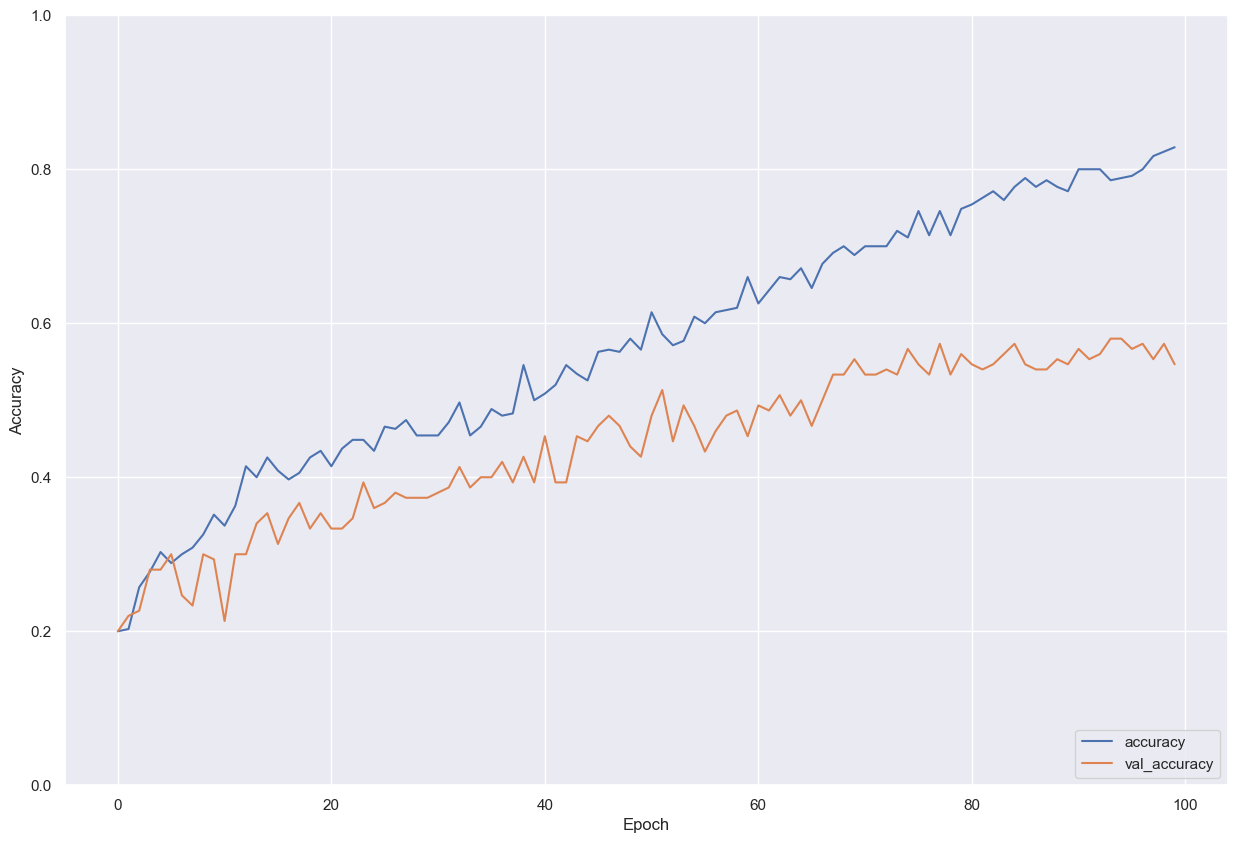

In [11]:
fig = plt.figure(figsize = (15, 10))


#fig.add_subplot(2,2, histories.index(history)+1)
plt.plot(raw_history.history['accuracy'], label='accuracy')
plt.plot(raw_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

## Processed dataset vs Raw dataset

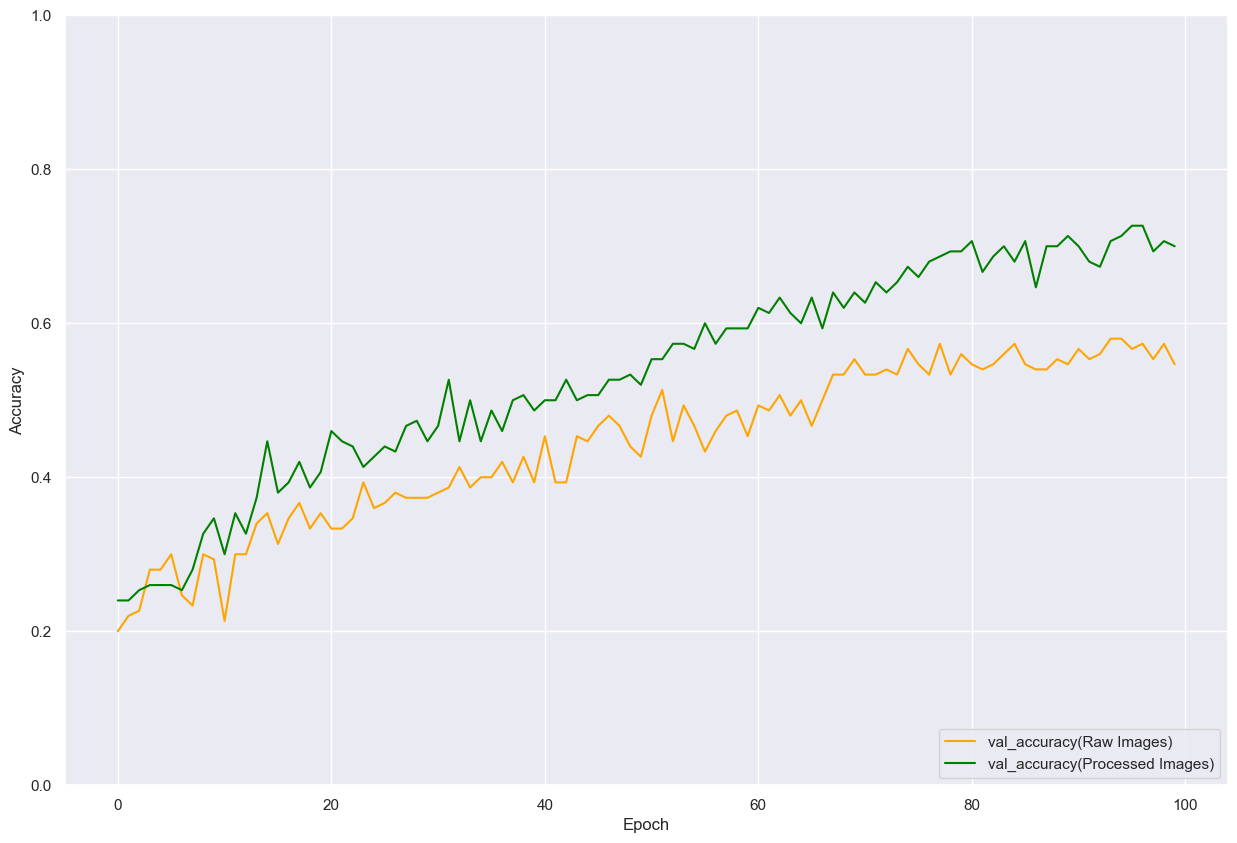

In [12]:
fig = plt.figure(figsize = (15, 10))


plt.plot(raw_history.history['val_accuracy'], label='val_accuracy(Raw Images)', color='orange')
plt.plot(processed_history.history['val_accuracy'], label = 'val_accuracy(Processed Images)', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

### Background removal, resizing and color correcting for prediction

### Load models

In [6]:
raw_model = tf.keras.models.load_model(path+'Models/raw_model')
processed_model = tf.keras.models.load_model(path+'Models/processed_model')
models = []

for i in range(len(categories) - 1):
    models.append(tf.keras.models.load_model(path + 'Models/model{}.h5'.format(i)))


2024-01-04 19:07:36.364155: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-04 19:07:36.588223: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-04 19:07:36.588502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
converter = tf.lite.TFLiteConverter.from_saved_model(path+'Models/processed_model') # path to the SavedModel directory
tflite_model = converter.convert()

2024-01-04 19:09:36.661161: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute debug_name which is not in the op definition: Op<name=VarHandleOp; signature= -> resource:resource; attr=container:string,default=""; attr=shared_name:string,default=""; attr=dtype:type; attr=shape:shape; attr=allowed_devices:list(string),default=[]; is_stateful=true> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node count}}
2024-01-04 19:09:36.686143: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-04 19:09:36.686165: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-04 19:09:36.686692: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/ch0ry/AI-Fashion-Discriminator/Models/processed_model
2024-01-04 19:09:36.688313: I tensorflow/cc/saved_model/reader.cc:91] Re

In [8]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [27]:
def predict_image(img, model=1):
    if model == 0:
        result = feedforward(remove(img))
        print(result)
        for res in result:
            if res > 0.5:
                return categories[result.indexof(res)]
            return categories[-1]
    if model == 1:
        res = processed_model.fit(remove(img))
        print(res)
        return categories[np.where(res == res.max())[0][0]]
    if model == 2:
        res = raw_model.fit(img)
        print(res)
        return categories[np.where(res == res.max())[0][0]]
        
        

In [ ]:
res = processed_model.predict(np.expand_dims(data[0][1], axis=0))


### Using webcam for taking pictures and predicting in real time

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(3,1920) # adjust width
cap.set(4,720) # adjust height
font = cv2.FONT_HERSHEY_SIMPLEX
img_counter = 0

wait = False
show = False

while True:
    success, img = cap.read()
    cv2.rectangle(img, (350, 20), (1000, 700), (0, 255, 0), 5)
     # This will open an independent window
    cv2.imshow("Webcam", img)
    if show:
        cv2.putText(img, 
                text, 
                (400, 600), 
                font, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4)
        cv2.imshow("Webcam", img)
   
    k = cv2.waitKey(1)
    if k%256 == 32:
        t1 = time.time()
        wait = True
        show = False
        
    if  wait and time.time() - t1 > 2:
            img_name = "opencv_frame_{}.png".format(img_counter)
            cv2.imwrite(img_name, img)
            print("{} written!".format(img_name))
            img_counter += 1
            ss = cv2.imread(img_name)
            ss = clean_background(cv2.cvtColor(ss, cv2.COLOR_RGB2BGR))
            text = predict_image(ss, 1)
            plt.imshow(ss)
            
            show = True
            wait = False
    if k%256 == 27: # quit when 'esc' is pressed
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1)